### Airbnb Project

In [24]:
# Airbnb Data Analysis and Cleaning Notebook
#importing requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Read the file
df = pd.read_excel('C:/Users/KIRAN BAVOR/Downloads/Airbnb_Open_Data.xlsx')

In [26]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [27]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [29]:
#Remove duplicates
df = df.drop_duplicates()

# Remove house_rules and license columns
columns_to_remove = ['house_rules', 'license']
for col in columns_to_remove:
    if col in df.columns:
        df = df.drop(col, axis=1)

#clear price and service column 
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

if 'service_fee' in df.columns:
    df['service_fee'] = df['service_fee'].astype(str).str.replace('$', '').str.replace(',', '')
    df['service_fee'] = pd.to_numeric(df['service_fee'], errors='coerce')

df['neighbourhood group'] = df['neighbourhood group'].str.replace('brookin', 'Brooklyn', case=False)



1. Different Property Types:
room type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64


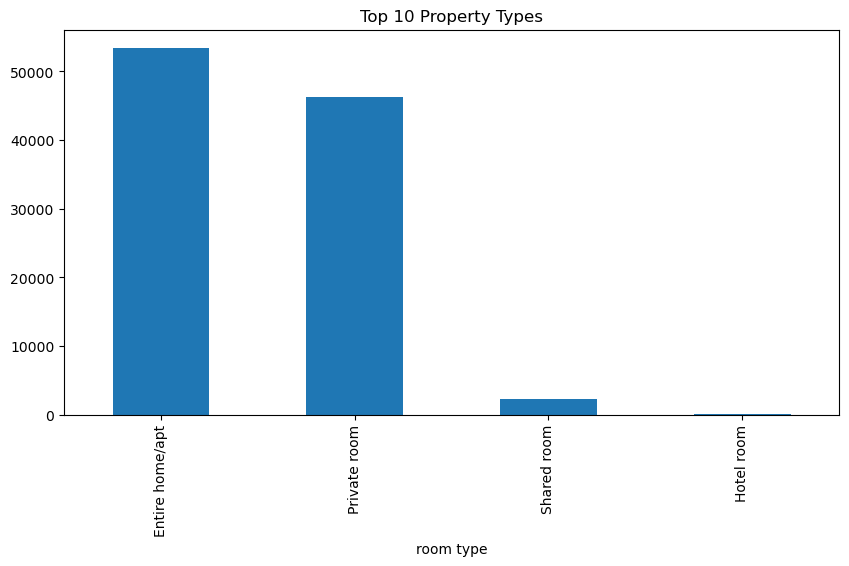

In [30]:
# QUESTION 1: What are the different property types?
print("1. Different Property Types:")
property_types = df['room type'].value_counts()
print(property_types)

#bar chart
plt.figure(figsize=(10,5))
property_types.head(10).plot(kind='bar')
plt.title('Top 10 Property Types')
plt.show()

2. Neighborhoods by Number of Listings:
neighbourhood group
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64


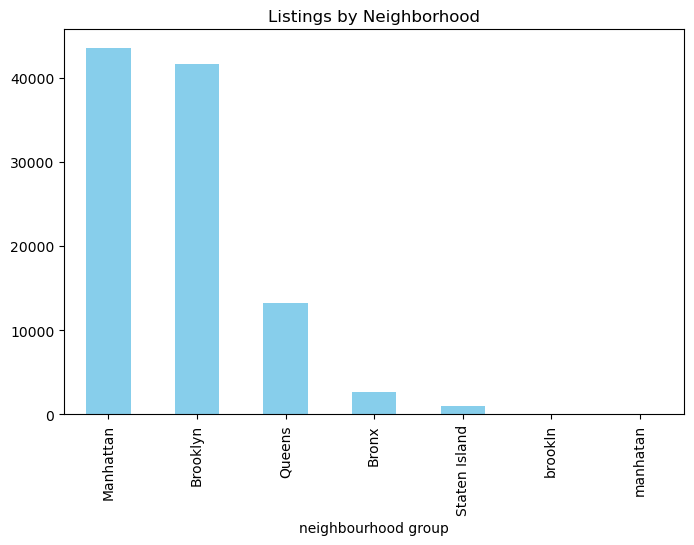

Most listings in: Manhattan


In [31]:
# QUESTION 2: Which neighborhood has the most listings?
print("2. Neighborhoods by Number of Listings:")
neighborhood_counts = df['neighbourhood group'].value_counts()
print(neighborhood_counts)

plt.figure(figsize=(8,5))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Listings by Neighborhood')
plt.show()

print("Most listings in:", neighborhood_counts.index[0])

3. Average Prices by Neighborhood:
neighbourhood group
Queens           630.217031
Bronx            627.764793
Brooklyn         626.501962
Staten Island    623.990486
Manhattan        622.650931
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


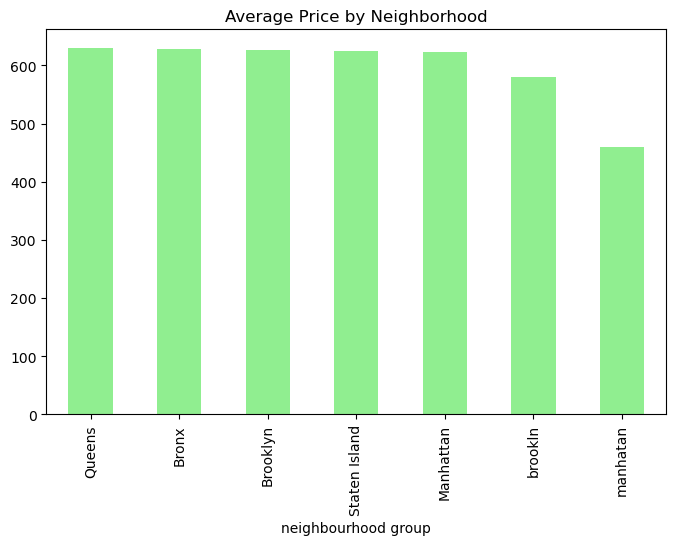

Highest average price in: Queens


In [32]:
# QUESTION 3: Which neighborhood has the highest average price?
print("3. Average Prices by Neighborhood:")
avg_prices = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print(avg_prices)

plt.figure(figsize=(8,5))
avg_prices.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Neighborhood')
plt.show()

print("Highest average price in:", avg_prices.index[0])

4. Top 10 Hosts with Most Listings:
host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


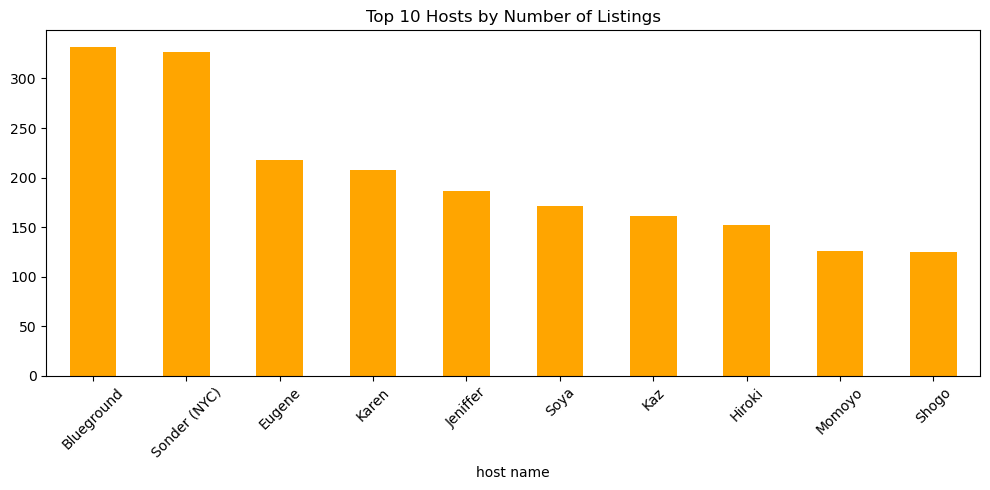

In [33]:
# QUESTION 4: Top 10 hosts with most listings
print("4. Top 10 Hosts with Most Listings:")
if 'calculated host listings count' in df.columns:
    top_hosts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
    print(top_hosts)
    
    plt.figure(figsize=(10,5))
    top_hosts.plot(kind='bar', color='orange')
    plt.title('Top 10 Hosts by Number of Listings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

5. Do verified hosts get better reviews?
host_identity_verified
unconfirmed    3.272033
verified       3.285675
Name: review rate number, dtype: float64


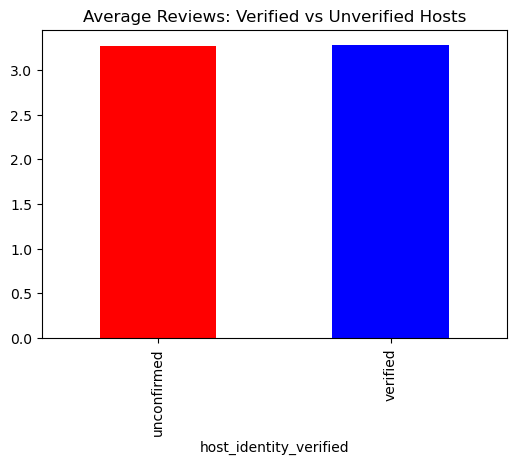

In [34]:
# QUESTION 5: Are verified hosts better rated?
print("5. Do verified hosts get better reviews?")
if 'host_identity_verified' in df.columns and 'review rate number' in df.columns:
    verified_reviews = df.groupby('host_identity_verified')['review rate number'].mean()
    print(verified_reviews)
    
    plt.figure(figsize=(6,4))
    verified_reviews.plot(kind='bar', color=['red', 'blue'])
    plt.title('Average Reviews: Verified vs Unverified Hosts')
    plt.show()

6. Price vs Service Fee Relationship:
Correlation: 1.00


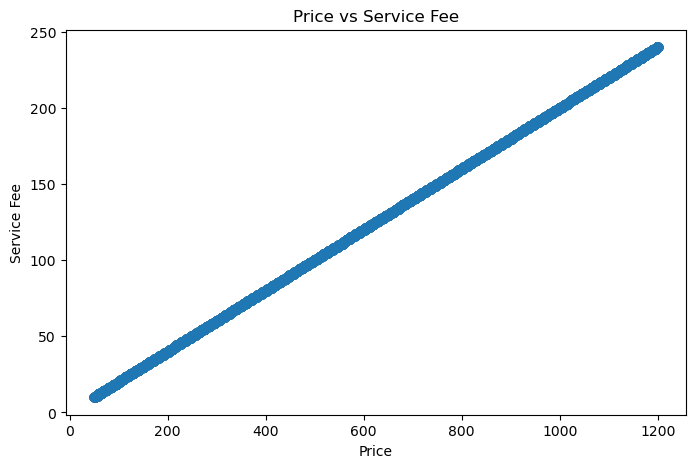

When price goes up, service fee also tends to go up


In [35]:
# QUESTION 6: Relationship between price and service fee
print("6. Price vs Service Fee Relationship:")
if 'service fee' in df.columns:
    correlation = df['price'].corr(df['service fee'])
    print(f"Correlation: {correlation:.2f}")
    
    plt.figure(figsize=(8,5))
    plt.scatter(df['price'], df['service fee'], alpha=0.5)
    plt.title('Price vs Service Fee')
    plt.xlabel('Price')
    plt.ylabel('Service Fee')
    plt.show()
    
    if correlation > 0:
        print("When price goes up, service fee also tends to go up")
    else:
        print("No clear relationship")

In [36]:
# QUESTION 7: Average review scores
print("7. Average Review Scores:")
if 'review rate number' in df.columns:
    overall_avg = df['review rate number'].mean()
    print(f"Overall average review: {overall_avg:.2f}")
    
    # By neighborhood
    neighborhood_reviews = df.groupby('neighbourhood group')['review rate number'].mean()
    print("\nBy neighborhood:")
    print(neighborhood_reviews)
    
    # By room type
    room_reviews = df.groupby('room type')['review rate number'].mean()
    print("\nBy room type:")
    print(room_reviews)

7. Average Review Scores:
Overall average review: 3.28

By neighborhood:
neighbourhood group
Bronx            3.331341
Brooklyn         3.258443
Manhattan        3.276528
Queens           3.330420
Staten Island    3.404030
brookln          4.000000
manhatan         3.000000
Name: review rate number, dtype: float64

By room type:
room type
Entire home/apt    3.274787
Hotel room         3.539130
Private room       3.281371
Shared room        3.305316
Name: review rate number, dtype: float64


8. Do hosts with more listings have better availability?
Correlation: 0.16


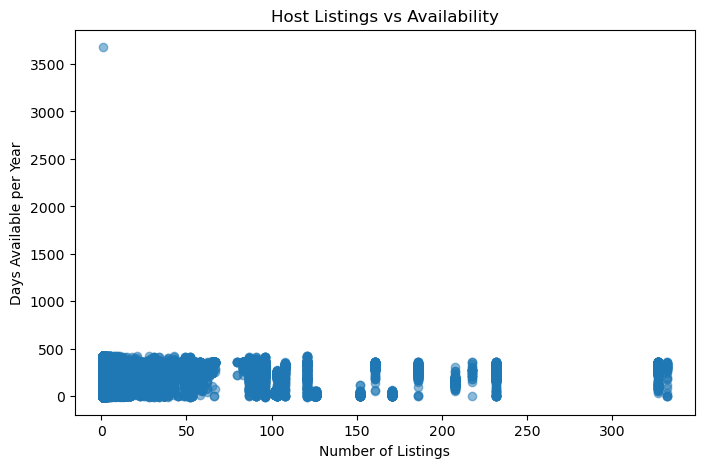

Hosts with more listings tend to be available more days


In [37]:
# QUESTION 8: Do hosts with more listings have better availability?
print("8. Do hosts with more listings have better availability?")
if 'calculated host listings count' in df.columns and 'availability 365' in df.columns:
    correlation = df['calculated host listings count'].corr(df['availability 365'])
    print(f"Correlation: {correlation:.2f}")
    
    # Simple scatter plot
    plt.figure(figsize=(8,5))
    plt.scatter(df['calculated host listings count'], df['availability 365'], alpha=0.5)
    plt.title('Host Listings vs Availability')
    plt.xlabel('Number of Listings')
    plt.ylabel('Days Available per Year')
    plt.show()
    
    if correlation > 0.1:
        print("Hosts with more listings tend to be available more days")
    elif correlation < -0.1:
        print("Hosts with more listings tend to be available fewer days")
    else:
        print("No clear relationship")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

9. Host Verification Status Analysis:
Host Verification Status:
host_identity_verified
unconfirmed    50944
verified       50825
Name: count, dtype: int64

Verified hosts: 49.8%
Unverified hosts: 0.0%


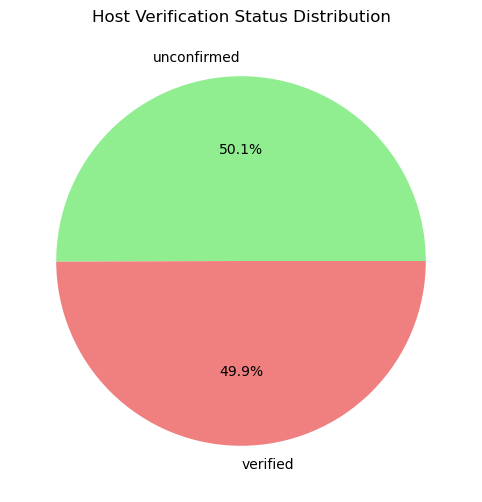

In [40]:
# QUESTION 9: What percentage of listings are from verified hosts?
print("9. Host Verification Status Analysis:")

if 'host_identity_verified' in df.columns:
    verification_stats = df['host_identity_verified'].value_counts()
    print("Host Verification Status:")
    print(verification_stats)
    
    # Calculate percentages
    total_hosts = len(df)
    verified_percentage = (verification_stats.get('verified', 0) / total_hosts) * 100
    unverified_percentage = (verification_stats.get('unverified', 0) / total_hosts) * 100
    
    print(f"\nVerified hosts: {verified_percentage:.1f}%")
    print(f"Unverified hosts: {unverified_percentage:.1f}%")
    
    # Simple pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(verification_stats.values, labels=verification_stats.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Host Verification Status Distribution')
    plt.show()
else:
    print("Host verification data not available in this dataset")

10. Instant Booking Availability:
Instant Booking Availability:
instant_bookable
0.0    51186
1.0    50767
Name: count, dtype: int64

Instant bookable listings: 0.0%
Non-instant bookable listings: 0.0%

Average price - Instant bookable: $625.52
Average price - Non-instant bookable: $625.18


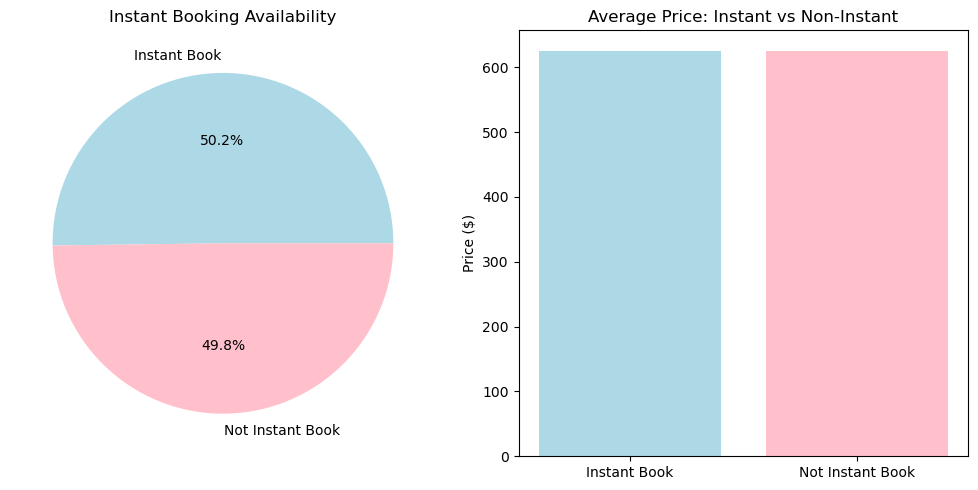

In [43]:
# QUESTION 10: How many listings have instant booking available?
print("10. Instant Booking Availability:")

if 'instant_bookable' in df.columns:
    instant_book_stats = df['instant_bookable'].value_counts()
    print("Instant Booking Availability:")
    print(instant_book_stats)
    
    # Calculate percentages
    total = len(df)
    instant_percentage = (instant_book_stats.get(True, 0) / total) * 100
    not_instant_percentage = (instant_book_stats.get(False, 0) / total) * 100
    
    print(f"\nInstant bookable listings: {instant_percentage:.1f}%")
    print(f"Non-instant bookable listings: {not_instant_percentage:.1f}%")
    
    # Compare prices between instant and non-instant bookable
    if 'price' in df.columns:
        instant_price = df[df['instant_bookable'] == True]['price'].mean()
        non_instant_price = df[df['instant_bookable'] == False]['price'].mean()
        
        print(f"\nAverage price - Instant bookable: ${instant_price:.2f}")
        print(f"Average price - Non-instant bookable: ${non_instant_price:.2f}")
    
    # Simple visualization
    plt.figure(figsize=(10, 5))
    
    # Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(instant_book_stats.values, labels=['Instant Book', 'Not Instant Book'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
    plt.title('Instant Booking Availability')
    
    # Bar chart with prices (if available)
    if 'price' in df.columns:
        plt.subplot(1, 2, 2)
        price_comparison = [instant_price, non_instant_price]
        labels = ['Instant Book', 'Not Instant Book']
        plt.bar(labels, price_comparison, color=['lightblue', 'pink'])
        plt.title('Average Price: Instant vs Non-Instant')
        plt.ylabel('Price ($)')
    
    plt.tight_layout()
    plt.show()
else:
    print("Instant booking data not available in this dataset")

11. Reviews vs Price Relationship:
                  price       
                   mean  count
review_category               
0-10             625.17  41892
11-50            625.54  26661
51-100           628.96   9962
100+             629.59   7464


C:\Users\KIRAN BAVOR\AppData\Local\Temp\ipykernel_15324\1938928983.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_price_analysis = df.groupby('review_category').agg({


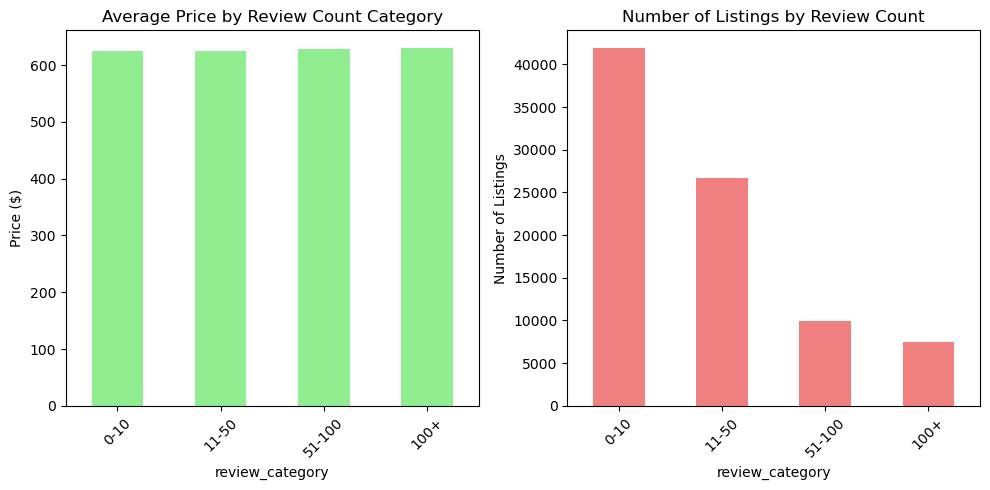


Correlation between number of reviews and price: 0.005


In [ ]:
# QUESTION 11: What's the relationship between number of reviews and price?
print("11. Reviews vs Price Relationship:")

# Create review categories
df['review_category'] = pd.cut(df['number of reviews'], 
                              bins=[0, 10, 50, 100, 1000],
                              labels=['0-10', '11-50', '51-100', '100+'])

# Analyze price by review category
review_price_analysis = df.groupby('review_category').agg({
    'price': ['mean', 'count']
}).round(2)

print(review_price_analysis)

# Simple visualization
plt.figure(figsize=(10, 5))

# Bar chart for average price
plt.subplot(1, 2, 1)
review_price_analysis[('price', 'mean')].plot(kind='bar', color='lightgreen')
plt.title('Average Price by Review Count Category')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

# Bar chart for number of listings
plt.subplot(1, 2, 2)
review_price_analysis[('price', 'count')].plot(kind='bar', color='lightcoral')
plt.title('Number of Listings by Review Count')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation
correlation = df['number of reviews'].corr(df['price'])
print(f"\nCorrelation between number of reviews and price: {correlation:.3f}")